In [ ]:
# proabdor de modelo 

x_test shape: (132, 200, 200, 3)
y_test shape: (132,)
y_test shape after one-hot encoding: (132, 4)
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.9944 - loss: 0.0914
Test Loss: 0.12450778484344482
Test Accuracy: 0.9924242496490479
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.97      1.00      0.99        34
           2       1.00      0.97      0.98        29
           3       1.00      1.00      1.00        45

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132



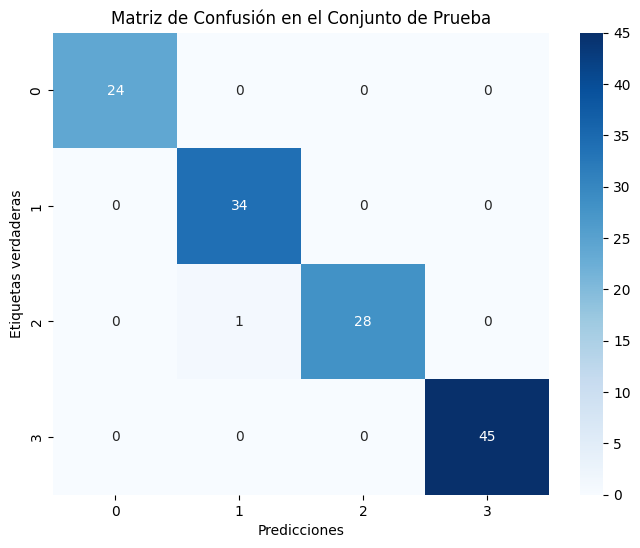

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Definir la ruta del directorio de pruebas
test_dir = r'D:\Universidad_Daniel_Suarez\2024_II\TRABAJO_DE_GRADO\Data_Set_Separado_Final\Pruebas_separadas'

# Función para cargar imágenes y etiquetas con reducción de tamaño
def load_images_and_labels(data_dir, target_size=(200, 200)):
    images = []
    labels = []
    # Obtener las subcarpetas (clases)
    subfolders = os.listdir(data_dir)
    for label in subfolders:
        class_dir = os.path.join(data_dir, label)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, file)
                img = load_img(img_path, target_size=target_size)  # Ajusta el tamaño de las imágenes
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(int(label))  # Asegura que las etiquetas sean enteros simples
    return np.array(images), np.array(labels)

# Cargar los datos de prueba
x_test, y_test = load_images_and_labels(test_dir, target_size=(200, 200))

# Verificar la carga de datos
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Convertir y_test a formato "one-hot encoded"
nclasses = 4  # Ajusta este número según tus clases
y_test_one_hot = to_categorical(y_test, num_classes=nclasses)
print(f'y_test shape after one-hot encoding: {y_test_one_hot.shape}')

# Cargar el mejor modelo guardado
best_model_path = r'D:\Universidad_Daniel_Suarez\2024_II\TRABAJO_DE_GRADO\Pruebas_Locales_CLASIFICADOR_PARTE_1_FINAL\Mejor_Modelo_fold_Entrega_final_TG.keras'
best_model = keras.models.load_model(best_model_path)

# Evaluación del modelo en los datos de prueba
test_metrics = best_model.evaluate(x_test, y_test_one_hot)
print(f"Test Loss: {test_metrics[0]}")
print(f"Test Accuracy: {test_metrics[1]}")

# Realiza las predicciones en los datos de prueba
y_pred_test = best_model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Convertir y_test nuevamente a etiquetas enteras para el informe de clasificación y la matriz de confusión
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Genera el informe de clasificación
test_report = classification_report(y_test_labels, y_pred_test_classes, target_names=[str(i) for i in range(nclasses)])
print("Test Classification Report:")
print(test_report)

# Calcula y visualiza la matriz de confusión
cm_test = confusion_matrix(y_test_labels, y_pred_test_classes)
labels = [str(i) for i in range(nclasses)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión en el Conjunto de Prueba')
plt.show()


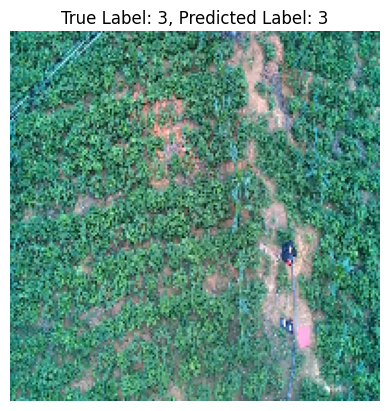

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Seleccionar un índice aleatorio de las imágenes de prueba
random_index = random.randint(0, len(x_test) - 1)

# Obtener la imagen y sus etiquetas
sample_image = x_test[random_index]
true_label = y_test_labels[random_index]
predicted_label = y_pred_test_classes[random_index]

# Mostrar la imagen
plt.imshow(sample_image.astype(np.uint8))
plt.axis("off")
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.show()
